In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/sarcasm.json -O sarcasm.json

--2023-04-21 16:13:45--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  14.9MB/s    in 0.4s    

2023-04-21 16:13:46 (14.9 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("sarcasm.json", "r") as file:
  texts = json.load(file)

In [ ]:
sentences = []
labels = []
links = []

for row in texts:
  sentences.append(row["headline"])
  labels.append(row["is_sarcastic"])
  links.append(row["article_link"])


In [ ]:
train_size = int(len(sentences) * 0.8)

x_train = sentences[:train_size]
y_train = np.array(labels[:train_size])

x_test = sentences[train_size:]
y_test = np.array(labels[train_size:])

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

VOCAB_SIZE = 20000
EMBEDDING_DIM = 8
MAX_LENGTH = 120

train_padded = pad_sequences(x_train, padding="post", truncating="post", maxlen=MAX_LENGTH)
test_padded = pad_sequences(x_test, padding="post", truncating="post", maxlen=MAX_LENGTH)

In [ ]:
model = Sequential()

model.add(layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [ ]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test))

Epoch 1/10
668/668 [==============================] - 19s 27ms/step - loss: 0.1671 - accuracy: 0.7499 - val_loss: 0.1116 - val_accuracy: 0.8443
Epoch 2/10
668/668 [==============================] - 5s 8ms/step - loss: 0.0830 - accuracy: 0.8907 - val_loss: 0.1012 - val_accuracy: 0.8574
Epoch 3/10
668/668 [==============================] - 3s 5ms/step - loss: 0.0608 - accuracy: 0.9228 - val_loss: 0.1017 - val_accuracy: 0.8555
Epoch 4/10
668/668 [==============================] - 4s 6ms/step - loss: 0.0466 - accuracy: 0.9450 - val_loss: 0.1045 - val_accuracy: 0.8555
Epoch 5/10
668/668 [==============================] - 4s 6ms/step - loss: 0.0352 - accuracy: 0.9617 - val_loss: 0.1100 - val_accuracy: 0.8502
Epoch 6/10
668/668 [==============================] - 3s 5ms/step - loss: 0.0262 - accuracy: 0.9724 - val_loss: 0.1148 - val_accuracy: 0.8487
Epoch 7/10
668/668 [==============================] - 3s 5ms/step - loss: 0.0193 - accuracy: 0.9814 - val_loss: 0.1191 - val_accuracy: 0.8439
Epoc

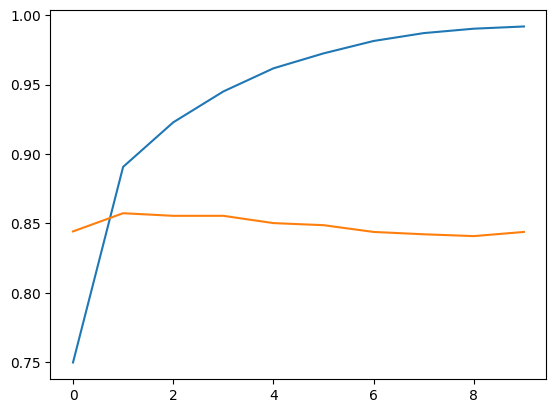

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
lstm_model = Sequential()

lstm_model.add(layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH))
lstm_model.add(layers.Bidirectional(layers.LSTM(8)))
lstm_model.add(layers.Dense(8, activation="relu"))
lstm_model.add(layers.Dense(1, activation="sigmoid"))

lstm_model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [ ]:
history_2 = lstm_model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test))

Epoch 1/10
668/668 [==============================] - 25s 30ms/step - loss: 0.1439 - accuracy: 0.7843 - val_loss: 0.1076 - val_accuracy: 0.8482
Epoch 2/10
668/668 [==============================] - 11s 16ms/step - loss: 0.0807 - accuracy: 0.8918 - val_loss: 0.1086 - val_accuracy: 0.8499
Epoch 3/10
668/668 [==============================] - 10s 15ms/step - loss: 0.0628 - accuracy: 0.9190 - val_loss: 0.1117 - val_accuracy: 0.8512
Epoch 4/10
668/668 [==============================] - 10s 15ms/step - loss: 0.0499 - accuracy: 0.9397 - val_loss: 0.1192 - val_accuracy: 0.8448
Epoch 5/10
668/668 [==============================] - 10s 15ms/step - loss: 0.0401 - accuracy: 0.9521 - val_loss: 0.1259 - val_accuracy: 0.8429
Epoch 6/10
668/668 [==============================] - 9s 13ms/step - loss: 0.0329 - accuracy: 0.9623 - val_loss: 0.1297 - val_accuracy: 0.8433
Epoch 7/10
668/668 [==============================] - 10s 15ms/step - loss: 0.0283 - accuracy: 0.9689 - val_loss: 0.1371 - val_accuracy: 

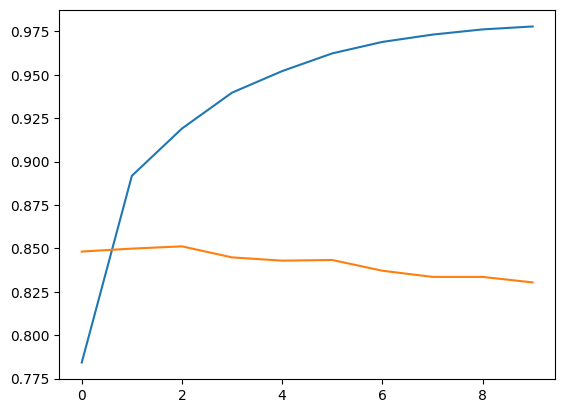

In [ ]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])

In [ ]:
conv_model = Sequential()

conv_model.add(layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH))
conv_model.add(layers.Conv1D(16, 5))
conv_model.add(layers.GlobalAveragePooling1D())
conv_model.add(layers.Dense(10, activation="relu"))
conv_model.add(layers.Dense(1, activation="sigmoid"))

conv_model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [ ]:
history_3 = conv_model.fit(train_padded, y_train, epochs=50, validation_data=(test_padded, y_test))

Epoch 1/50
668/668 [==============================] - 17s 23ms/step - loss: 0.2156 - accuracy: 0.6407 - val_loss: 0.1463 - val_accuracy: 0.8006
Epoch 2/50
668/668 [==============================] - 5s 7ms/step - loss: 0.1223 - accuracy: 0.8307 - val_loss: 0.1244 - val_accuracy: 0.8253
Epoch 3/50
668/668 [==============================] - 5s 8ms/step - loss: 0.0984 - accuracy: 0.8668 - val_loss: 0.1199 - val_accuracy: 0.8321
Epoch 4/50
668/668 [==============================] - 4s 6ms/step - loss: 0.0857 - accuracy: 0.8852 - val_loss: 0.1188 - val_accuracy: 0.8349
Epoch 5/50
668/668 [==============================] - 4s 6ms/step - loss: 0.0762 - accuracy: 0.9014 - val_loss: 0.1202 - val_accuracy: 0.8351
Epoch 6/50
668/668 [==============================] - 5s 7ms/step - loss: 0.0690 - accuracy: 0.9117 - val_loss: 0.1220 - val_accuracy: 0.8364
Epoch 7/50
668/668 [==============================] - 4s 6ms/step - loss: 0.0633 - accuracy: 0.9197 - val_loss: 0.1244 - val_accuracy: 0.8362
Epoc

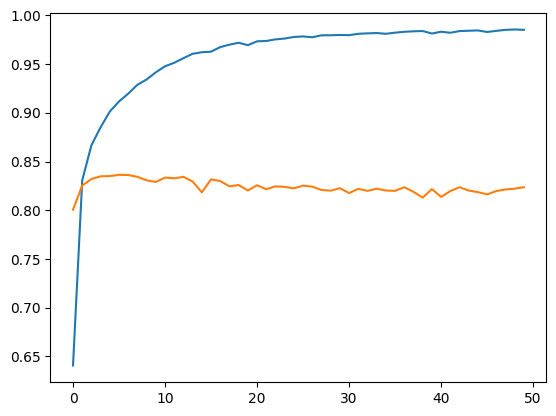

In [ ]:
plt.plot(history_3.history["accuracy"])
plt.plot(history_3.history["val_accuracy"])